In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline

import requests
data = requests.get('http://www.gutenberg.org/files/1399/1399-h/1399-h.htm')
content = data.content

import re
from bs4 import BeautifulSoup
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

clean_content = strip_html_tags(content)
sample_text = clean_content[1932:2721]
sample_text2 = sample_text.replace("\n", " ")
sample_text2

### remove \n from text
sample_text2 = sample_text.replace("\n", " ")

SENTENCE_TOKENS_PATTERN = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)(?<=\.|\?|\!)\s'
regex_st = nltk.tokenize.RegexpTokenizer(
            pattern=SENTENCE_TOKENS_PATTERN,
            gaps=True)
sample_sentences = regex_st.tokenize(sample_text2)
print('Total sentences in sample_text:', len(sample_sentences), '\n')
print('Sample text sentences : \n', np.array(sample_sentences))

Total sentences in sample_text: 5 

Sample text sentences : 
 ['Happy families are all alike; every unhappy family is unhappy in its own way.'
 'Everything was in confusion in the Oblonskys’ house.'
 'The wife had discovered that the husband was carrying on an intrigue with a French girl, who had been a governess in their family, and she had announced to her husband that she could not go on living in the same house with him.'
 'This position of affairs had now lasted three days, and not only the husband and wife themselves, but all the members of their family and household, were painfully conscious of it.'
 'Every person in the house felt that there was no sense in their living together, and that the stray people brought together by chance in any inn had more in common with one another than they, the members of the family and household of the Oblonskys.']


In [3]:
### example corpus and feature engineering

In [4]:
# building a corpus of documents
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


In [50]:
corpus = np.array(sample_sentences)
corpus_df = pd.DataFrame({'Document': corpus})

Since the focus of this article is on feature engineering, we build a simple text preprocessor that focuses on removing special characters, extra whitespace, digits, stopwords, and then lowercasing the text corpus.

In [15]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
def normalize_document(doc):
    # lowercase and remove special characters\whitespace
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc
normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['happy families alike every unhappy family unhappy way',
       'everything confusion oblonskys house',
       'wife discovered husband carrying intrigue french girl governess family announced husband could go living house',
       'position affairs lasted three days husband wife members family household painfully conscious',
       'every person house felt sense living together stray people brought together chance inn common one another members family household oblonskys'],
      dtype='<U140')

### bag of words model

The Bag of Words model represents each text document as a numeric vector where each dimension is a specific word from the corpus and the value could be its frequency in the document, occurrence (denoted by 1 or 0), or even weighted values. The model’s name is such because each document is represented literally as a bag of its own words, disregarding word order, sequences, and grammar.


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<5x44 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [25]:
# view non-zero feature positions in the sparse matrix
print(cv_matrix)

  (0, 22)	1
  (0, 15)	1
  (0, 1)	1
  (0, 13)	1
  (0, 41)	2
  (0, 16)	1
  (0, 42)	1
  (1, 14)	1
  (1, 8)	1
  (1, 31)	1
  (1, 23)	1
  (2, 16)	1
  (2, 23)	1
  (2, 43)	1
  (2, 12)	1
  (2, 25)	2
  (2, 5)	1
  (2, 27)	1
  (2, 18)	1
  (2, 19)	1
  (2, 21)	1
  (2, 2)	1
  (2, 10)	1
  (2, 20)	1
  (2, 29)	1
  :	:
  (3, 39)	1
  (3, 11)	1
  (3, 30)	1
  (3, 24)	1
  (3, 33)	1
  (3, 9)	1
  (4, 13)	1
  (4, 16)	1
  (4, 31)	1
  (4, 23)	1
  (4, 29)	1
  (4, 30)	1
  (4, 24)	1
  (4, 35)	1
  (4, 17)	1
  (4, 37)	1
  (4, 40)	2
  (4, 38)	1
  (4, 34)	1
  (4, 4)	1
  (4, 6)	1
  (4, 26)	1
  (4, 7)	1
  (4, 32)	1
  (4, 3)	1


The preceding output tells us the total count for each (x, y) pair. Here, x represents a document and y represents a specific word/feature and the value is the number of times y occurs in x. We can leverage the following code to view the output in a dense matrix representation.


In [26]:
# view dense representation
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0]])

Thus, you can see that these documents have been converted into numeric vectors so that each document is represented by one vector (row) in the feature matrix and each column represents a unique word as a feature. The following code represents this in a more easy to understand format. 

In [19]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,affairs,alike,announced,another,brought,carrying,chance,common,confusion,conscious,...,people,person,position,sense,stray,three,together,unhappy,way,wife
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4,0,0,0,1,1,0,1,1,0,0,...,1,1,0,1,1,0,2,0,0,0


### bag of words n-grams model

A word is just a single token, often known as a unigram or 1-gram. We already know that the Bag of Words model doesn’t consider the order of words. But what if we also wanted to take into account phrases or collection of words that occur in a sequence? N-grams help us do that. An N-gram is basically a collection of word tokens from a text document such that these tokens are contiguous and occur in a sequence. Bi-grams indicate n-grams of order 2 (two words), tri-grams indicate n-grams of order 3 (three words), and so on. The Bag of N-Grams model is just an extension of the Bag of Words model that leverages N-gram based features.

In [31]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(1,2))
bv_matrix = bv.fit_transform(norm_corpus)
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,affairs,affairs lasted,alike,alike every,announced,announced husband,another,another members,brought,brought together,...,together,together chance,together stray,unhappy,unhappy family,unhappy way,way,wife,wife discovered,wife members
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,2,1,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,1,1,1,1,...,2,1,1,0,0,0,0,0,0,0


This gives us feature vectors for our documents, where each feature consists of a bi-gram representing a sequence of two words and values represent how many times the bi-gram was present for our documents. 

### TF-IDF model 

There are some potential problems that might arise with the Bag of Words model when it is used on large corpora. Since the feature vectors are based on absolute term frequencies, there might be some terms that occur frequently across all documents and these may tend to overshadow other terms in the feature set. Especially words that don’t occur as frequently, but might be more interesting and effective as features to identify specific categories. 

This is where TF-IDF comes into the picture. TF-IDF stands for term frequency-inverse document frequency. It’s a combination of two metrics, term frequency (tf) and inverse document frequency (idf). 

TFIDF = TF x IDF

Inverse document frequency denoted by idf is the inverse of the document frequency for each term and is computed by dividing the total number of documents in our corpus by the document frequency for each term and then applying logarithmic scaling to the result.

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
tt = TfidfTransformer(norm='l2', use_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)
tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,affairs,alike,announced,another,brought,carrying,chance,common,confusion,conscious,...,people,person,position,sense,stray,three,together,unhappy,way,wife
0,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.67,0.33,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.27,0.00,0.00,0.27,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22
3,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,...,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.00,0.00,0.26
4,0.00,0.00,0.00,0.23,0.23,0.00,0.23,0.23,0.00,0.00,...,0.23,0.23,0.00,0.23,0.23,0.00,0.46,0.00,0.00,0.00


let's do this with the n-grams model

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer
tt = TfidfTransformer(norm='l2', use_idf=True)
tt_matrix = tt.fit_transform(bv_matrix)
tt_matrix = tt_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,affairs,affairs lasted,alike,alike every,announced,announced husband,another,another members,brought,brought together,...,together,together chance,together stray,unhappy,unhappy family,unhappy way,way,wife,wife discovered,wife members
0,0.00,0.00,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.5,0.25,0.25,0.25,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.19,0.19,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.15,0.19,0.00
3,0.22,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.18,0.00,0.22
4,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.16,0.16,0.16,...,0.33,0.16,0.16,0.0,0.00,0.00,0.00,0.00,0.00,0.00


### TFIDF VECTORIZER

You don’t always need to generate features beforehand using a Bag of Words or count based model before engineering TF-IDF features. The TfidfVectorizer by Scikit-Learn enables us to directly compute the tfidf vectors by taking the raw documents as input and internally computing the term frequencies as well as the inverse document frequencies. This eliminates the need to use CountVectorizer to compute the term frequencies based on the Bag of Words model.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm="l2",
                     use_idf=True, smooth_idf=True)

tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,affairs,alike,announced,another,brought,carrying,chance,common,confusion,conscious,...,people,person,position,sense,stray,three,together,unhappy,way,wife
0,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.67,0.33,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.27,0.00,0.00,0.27,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22
3,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,...,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.00,0.00,0.26
4,0.00,0.00,0.00,0.23,0.23,0.00,0.23,0.23,0.00,0.00,...,0.23,0.23,0.00,0.23,0.23,0.00,0.46,0.00,0.00,0.00


Support is also present for adding n-grams to the feature vectors. 

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm="l2",
                     use_idf=True, smooth_idf=True, ngram_range = (1,2))

tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,affairs,affairs lasted,alike,alike every,announced,announced husband,another,another members,brought,brought together,...,together,together chance,together stray,unhappy,unhappy family,unhappy way,way,wife,wife discovered,wife members
0,0.00,0.00,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.5,0.25,0.25,0.25,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.19,0.19,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.15,0.19,0.00
3,0.22,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.18,0.00,0.22
4,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.16,0.16,0.16,...,0.33,0.16,0.16,0.0,0.00,0.00,0.00,0.00,0.00,0.00


### document similarity 

Document similarity is the process of using a distance or similarity based metric that can identify how similar a text document is to any other document(s) based on features extracted from the documents, like Bag of Words or TF-IDF.

Thus you can see that we can build on top of the TF-IDF-based features we engineered in the previous section and use them to generate new features.

Pairwise document similarity in a corpus involves computing document similarity for each pair of documents in a corpus. Thus, if you have C documents in a corpus, you would end up with a C x C matrix, such that each row and column represents the similarity score for a pair of documents.

In our analysis, we use perhaps the most popular and widely used similarity metrics—cosine similarity and compare pairwise document similarity—based on their TF-IDF feature vectors.

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4
0,1.000000,0.000000,0.015099,0.017663,0.039665
1,0.000000,1.000000,0.034524,0.000000,0.072868
2,0.015099,0.034524,1.000000,0.095966,0.044088
3,0.017663,0.000000,0.095966,1.000000,0.106325
4,0.039665,0.072868,0.044088,0.106325,1.000000


### document clustering with similarity features

We have been building a lot of features, but let’s use some of them now for a real-world problem of grouping similar documents! Clustering leverages unsupervised learning to group data points (documents in this scenario) into groups or clusters. 

Since we already have our similarity features, let’s build the linkage matrix on our sample documents. 

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2',
                         'Distance', 'Cluster Size'], dtype="object")

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,3,4,1.2672,2
1,2,5,1.33328,3
2,1,6,1.40003,4
3,0,7,1.42505,5


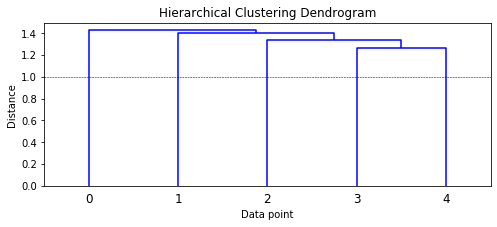

In [48]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c="k", ls="--", lw=0.5)

In [51]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0
cluster_labels = fcluster(Z, max_dist, criterion="distance")
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,ClusterLabel
0,Happy families are all alike; every unhappy family is unhappy in its own way.,5
1,Everything was in confusion in the Oblonskys’ house.,4
2,"The wife had discovered that the husband was carrying on an intrigue with a French girl, who had been a governess in their family, and she had announced to her husband that she could not go on liv...",3
3,"This position of affairs had now lasted three days, and not only the husband and wife themselves, but all the members of their family and household, were painfully conscious of it.",1
4,"Every person in the house felt that there was no sense in their living together, and that the stray people brought together by chance in any inn had more in common with one another than they, the ...",2


Obivously, clustered into 5 groups as none of the sentences are similar to each other.
But this should give you a good idea of how our TF-IDF features were leveraged to build our similarity features, which in turn helped in clustering our documents. You can use this pipeline in the future for clustering your own documents. 

### topic modelling

The idea of topic models revolves around the process of extracting key themes or concepts from a corpus of documents, which are represented as topics. Each topic can be represented as a bag or collection of words/terms from the document corpus. Together, these terms signify a specific topic, theme, or a concept and each topic can be easily distinguished from other topics by virtue of the semantic meaning conveyed by these terms.

However, often you do end up with overlapping topics based on the data. These concepts can range from simple facts and statements to opinions and outlook. Topic models are extremely useful in summarizing large corpus of text documents to extract and depict key concepts. 



We use another technique called Latent Dirichlet Allocation (LDA) , which uses a generative probabilistic model where each document consists of a combination of several topics and each term or word can be assigned to a specific topic. 

 Frameworks like Gensim or Scikit-Learn enable us to leverage the LDA model for generating topics. For the purpose of feature engineering, which is the intent of this chapter, you need to remember that when LDA is applied to a document-term matrix (TF-IDF or Bag of Words feature matrix), it is broken into two main components.


In [64]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features

,T1,T2,T3
0,0.037628,0.924484,0.037888
1,0.863708,0.069304,0.066987
2,0.021514,0.956275,0.022212
3,0.025894,0.026982,0.947124
4,0.016754,0.966553,0.016693


In [65]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('families alike', 1.3371316095361778), ('discovered', 1.3330020191399403), ('brought', 1.332725497211299), ('common', 1.332725497211299)]

[('confusion', 3.3310099069938386), ('discovered', 2.332944328802885), ('girl', 2.332675529665739), ('everything confusion', 2.332574203831305), ('chance inn', 2.3322574849109863), ('girl governess', 2.3318374391727006), ('every', 2.3295564365412678), ('alike every', 1.3326368765918362), ('announced', 1.3326368765918362), ('another', 1.3326368765918362), ('another members', 1.3326368765918362), ('confusion oblonskys', 1.3326368765918362), ('every person', 1.3326368765918362), ('family', 1.3326368765918362), ('family household', 1.3326368765918362), ('family unhappy', 1.3326368765918362), ('felt sense', 1.3326368765918362), ('french', 1.3326368765918362), ('alike', 1.3324221291939646), ('announced husband', 1.3324221291939646), ('carrying', 1.3324221291939646), ('chance', 1.3324221291939646), ('conscious', 1.3324221291939646), ('could', 1.332422129

Thus, you can clearly see the three topics are quite distinguishable from each other based on their constituent terms. 

We will look into topic modelling in more detail later!